<a href="https://colab.research.google.com/github/ftxsilva/Parallel-Computing-CUDA/blob/master/CUDA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyCuda

import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation


   

(2000, 784)
(2000, 1)
(1000, 784)
(1000, 1)
epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9


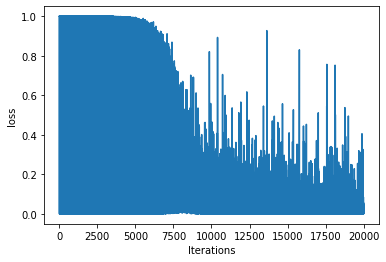

y_true= 0.0   / y_pred= 0     precisely: -0.0


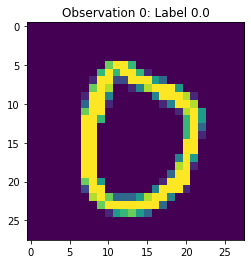

y_true= 1.0   / y_pred= 1     precisely: 1.21


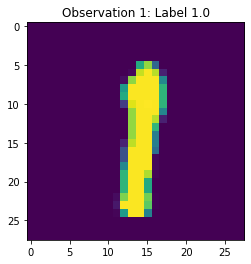

y_true= 1.0   / y_pred= 1     precisely: 0.65


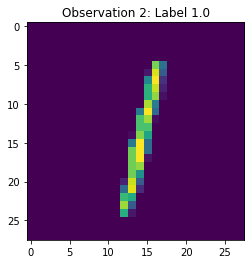

y_true= 0.0   / y_pred= 0     precisely: 0.01


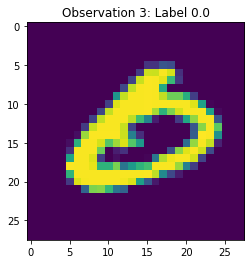

y_true= 0.0   / y_pred= 0     precisely: 0.13


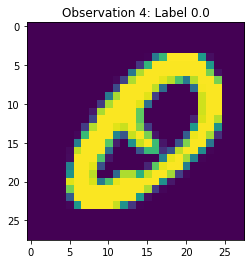

y_true= 0.0   / y_pred= 0     precisely: -0.0


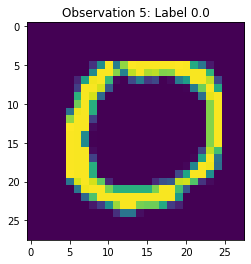

y_true= 0.0   / y_pred= 0     precisely: -0.0


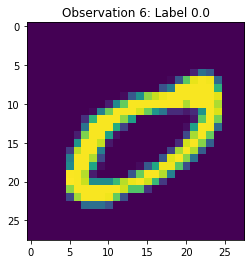

y_true= 0.0   / y_pred= 0     precisely: -0.0


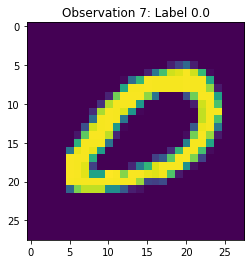

y_true= 0.0   / y_pred= 0     precisely: -0.0


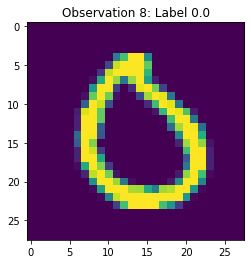

y_true= 1.0   / y_pred= 1     precisely: 1.16


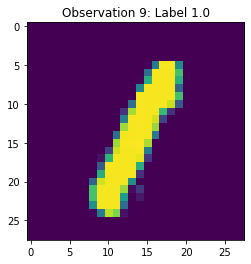

In [ ]:

def ShowMNISTObservation(X_data,y_data,obsNb=0):
  plt.clf()
  plt.imshow(X_data[obsNb,:].reshape((28,28)))
  plt.title('Observation '+str(obsNb)+': Label '+str((y_data[obsNb,0])))
  plt.show()



class SimpleNN():
  """
  Simple neural network with two fully connected layers and a rectified linear unit (ReLU) between them
  Inputs are in dimension p and outputs are in dimension 1. 
  Remark: NN training is performed at each iteration using a single observation. We then use here an
  online training procedure and not a more standard mini-batch training. Our goal here is to make the 
  code simple for pedagogical purposes. 
  """
  
  def __init__(self,p,convspeed=0.1):
    """
    Initialize the simple NN
    """
    self.p=p
    self.convspeed=convspeed
    self.theta1=np.random.randn(1,100)/100
    self.theta2=np.random.randn(100,self.p)/self.p
  
    self.Grad_theta1_E=np.zeros((1,100))
    self.Grad_theta2_E=np.zeros((100,self.p))
  
  def predict(self,X_curr):
    """
    Predic the output of the input X_curr. X_curr must be a numpy array of dimension (p)
    """
    #1ST LAYER 
    theta2_X=np.dot(self.theta2,X_curr)  
    
    #RELU
    ReluFilter=1*(theta2_X>0)            
    Filtered_theta2_X=ReluFilter*theta2_X
    
    #2ND LAYER
    y_pred=np.dot(self.theta1,Filtered_theta2_X)[0]
    
    return y_pred
  
  
  def CptGrads(self,X_curr,y_curr_true,y_curr_pred):
    """
    Compute the loss gradient w.r.t. the two layers parameters. We consider that the loss
    is (y_true-y_pred)^2, where  y_true and y_pred are in R. X_curr is also a numpy array 
    of dimension (p). 
    Remark: a single observation is used at each iteration to estimate the minimized energy.
    Online training and not mini-batch training is then performed here. 
    """
    
    #cpt self.Grad_theta1_E
    theta2_X=np.dot(self.theta2,X_curr)
    ReluFilter=1*(theta2_X>0)
    self.Grad_theta1_E=-2*(y_curr_true-y_curr_pred)*(theta2_X*ReluFilter)
    self.Grad_theta1_E=self.Grad_theta1_E.reshape(1,100)
    
    #cpt self.Grad_theta2_E
    filtered_theta1=(self.theta1*ReluFilter).reshape(100,1)
    self.Grad_theta2_E=-2*(y_curr_true-y_curr_pred)*np.dot(filtered_theta1,X_curr.reshape(1,self.p))

  def Update(self):
    """
    Update the parameters of layers 1 and 2 with gradients that have been estimated using 
    the class method 'CptGrads'
    """
    self.theta1=self.theta1-self.convspeed*self.Grad_theta1_E
    self.theta2=self.theta2-self.convspeed*self.Grad_theta2_E


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#1) load and treat the data

data=np.genfromtxt('mnist_0_1.csv',delimiter=',')



n_tot=data.shape[0]
p=data.shape[1]

y_train=data[:int(2.*n_tot/3.),0].reshape(-1,1)
X_train=data[:int(2.*n_tot/3.),1:]/(255.*p)

y_test=data[int(2.*n_tot/3.):,0].reshape(-1,1)
X_test=data[int(2.*n_tot/3.):,1:]/(255.*p)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



#ShowMNISTObservation(X_train,y_train,0)
#ShowMNISTObservation(X_train,y_train,1)
#...
#ShowMNISTObservation(X_test,y_train,1)




#2) train


SNN=SimpleNN(X_train.shape[1],convspeed=0.1)


n=X_train.shape[0]
ListLosses=[]

for epoch in range(10):
    print('epoch:',epoch)
    obsIDs=np.arange(n) 
    np.random.shuffle(obsIDs)
    
    for i in range(n):
        
        currObs=obsIDs[i]
        X_curr=X_train[currObs,:]
        y_curr_true=y_train[currObs,0]
        
        y_curr_pred=SNN.predict(X_curr)
        
        ListLosses.append(np.power(y_curr_true-y_curr_pred,2.))
        
        SNN.CptGrads(X_curr,y_curr_true,y_curr_pred)
        
        SNN.Update()


plt.plot(np.array(ListLosses))
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()
    

#3) train


for currObs in range(10):
   y_pred=SNN.predict(X_test[currObs,:])
   print('y_true=',y_test[currObs,0],'  / y_pred=',1*(y_pred>0.5),'    precisely:',np.round(y_pred,2))
   ShowMNISTObservation(X_test,y_test,currObs)
   

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#QUESTIONS :
#   1) Jouer et bien comprendre le code.
#   2) Utiliser PyCuda ou bien PyOpenCL pour accelerer le code.
#   3) (optionel) Traiter en GPGPU plusieurs observations a la fois pour faire de l'apprentissage
#      mini-batch et pas seulement du online.
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
import numpy as np
from pycuda import driver, compiler, gpuarray, tools
import time

# -- initialize the device
import pycuda.autoinit


#get device information
MyDevice=pycuda.driver.Device(0)
MyDevice.get_attributes()

{pycuda._driver.device_attribute.MAX_THREADS_PER_BLOCK: 1024,
 pycuda._driver.device_attribute.MAX_BLOCK_DIM_X: 1024,
 pycuda._driver.device_attribute.MAX_BLOCK_DIM_Y: 1024,
 pycuda._driver.device_attribute.MAX_BLOCK_DIM_Z: 64,
 pycuda._driver.device_attribute.MAX_GRID_DIM_X: 2147483647,
 pycuda._driver.device_attribute.MAX_GRID_DIM_Y: 65535,
 pycuda._driver.device_attribute.MAX_GRID_DIM_Z: 65535,
 pycuda._driver.device_attribute.MAX_SHARED_MEMORY_PER_BLOCK: 49152,
 pycuda._driver.device_attribute.TOTAL_CONSTANT_MEMORY: 65536,
 pycuda._driver.device_attribute.WARP_SIZE: 32,
 pycuda._driver.device_attribute.MAX_PITCH: 2147483647,
 pycuda._driver.device_attribute.MAX_REGISTERS_PER_BLOCK: 65536,
 pycuda._driver.device_attribute.CLOCK_RATE: 1328500,
 pycuda._driver.device_attribute.TEXTURE_ALIGNMENT: 512,
 pycuda._driver.device_attribute.GPU_OVERLAP: 1,
 pycuda._driver.device_attribute.MULTIPROCESSOR_COUNT: 56,
 pycuda._driver.device_attribute.KERNEL_EXEC_TIMEOUT: 0,
 pycuda._driver.device

In [ ]:
Batch_size = 16
input_size = 784
hidden_size = 100

# define the (square) matrix size
def dotprod(a_gpu,b_gpu,Batch_size = Batch_size,input_size = input_size, hidden_size = hidden_size):
    kernel_code_template = """
    __global__ void MatrixMulKernel(float *A, float *B, float *C)
    {
      // Shared memory for the sub-matrix of A
      __shared__ float As[1][%(input_size)s];
      // Shared memory for the sub-matrix of B
      __shared__ float Bs[%(input_size)s][%(hidden_size)s];
      
      float Csub = 0;
      // Loop over all the sub-matrices of A and B required to
      // compute the block sub-matrix
      for (int a = 0;
           a < %(Batch_size)s;
           a += 1)
        {

          // Load the matrices from global memory to shared memory
          // each thread loads one element of each matrix
          As = A[a];
          Bs = B;

          // Multiply the two matrices together;
          // each thread computes one element 
          // of the block sub-matrix
          for (int j = 0; j < %(hidden_size)s; ++j)
          {
            for (int k = 0; k < %(input_size)s; ++k)
              Csub += As[k] * Bs[k][j];
        
            C[a][j] = Csub;
          }
        }
    }
    """

    # define size of blocks and tiles sub-matrix
    # (we assume that the block size is same as tile size)
    TILE_SIZE = 8
    BLOCK_SIZE = TILE_SIZE

    # get the kernel code from the template
    # by specifying the constants MATRIX_SIZE and BLOCK_SIZE
    kernel_code = kernel_code_template % {
        'BLOCK_SIZE': BLOCK_SIZE,
        'Batch_size': Batch_size,
        'input_size': input_size,
        'hidden_size': hidden_size
        }

    # compile the kernel code
    mod = compiler.SourceModule(kernel_code)
    # create empty gpu array for the result (C = A * B)
    c_gpu = gpuarray.empty((Batch_size, hidden_size), np.float32)

    # get the kernel function from the compiled module
    dotprod = mod.get_function("MatrixMulKernel")

    # call the kernel on the card
    time_start=time.time()
    dotprod(
        # inputs
        a_gpu, b_gpu,
        # output
        c_gpu
        )
    time_end=time.time()
    print('enlapsed time (GPU):',time_end-time_start,' seconds')

    return c_gpu

# create two random square matrices
a_cpu = np.random.randn(Batch_size, input_size).astype(np.float32)
b_cpu = np.random.randn(input_size, hidden_size).astype(np.float32)

# transfer host (CPU) memory to device (GPU) memory
a_gpu = gpuarray.to_gpu(a_cpu)
b_gpu = gpuarray.to_gpu(b_cpu)
c_gpu = dotprod(a_gpu,b_gpu)


# print the results
print("-" * 80)
print("Matrix A (GPU):")
print(a_gpu.get())

print("-" * 80)
print("Matrix B (GPU):")
print(b_gpu.get())

print("-" * 80)
print("Matrix C (GPU):")
print(c_gpu.get())


CompileError: ignored

In [ ]:
class SimpleNN():
  """
  Simple neural network with two fully connected layers and a rectified linear unit (ReLU) between them
  Inputs are in dimension p and outputs are in dimension 1. 
  Remark: NN training is performed at each iteration using a single observation. We then use here an
  online training procedure and not a more standard mini-batch training. Our goal here is to make the 
  code simple for pedagogical purposes. 
  """
  
  def __init__(self,p,convspeed=0.1):
    """
    Initialize the simple NN
    """
    self.p=p
    self.convspeed=convspeed
    self.theta1=np.random.randn(1,100)/100
    self.theta2=np.random.randn(100,self.p)/self.p
  
    self.Grad_theta1_E=np.zeros((1,100))
    self.Grad_theta2_E=np.zeros((100,self.p))
  
  def predict(self,X_curr):
    """
    Predic the output of the input X_curr. X_curr must be a numpy array of dimension (p)
    """
    #1ST LAYER 
    theta2_X=np.dot(self.theta2,X_curr)  
    
    #RELU
    ReluFilter=1*(theta2_X>0)            
    Filtered_theta2_X=ReluFilter*theta2_X
    
    #2ND LAYER
    y_pred=np.dot(self.theta1,Filtered_theta2_X)[0]
    
    return y_pred
  
  
  def CptGrads(self,X_curr,y_curr_true,y_curr_pred):
    """
    Compute the loss gradient w.r.t. the two layers parameters. We consider that the loss
    is (y_true-y_pred)^2, where  y_true and y_pred are in R. X_curr is also a numpy array 
    of dimension (p). 
    Remark: a single observation is used at each iteration to estimate the minimized energy.
    Online training and not mini-batch training is then performed here. 
    """
    
    #cpt self.Grad_theta1_E
    theta2_X=np.dot(self.theta2,X_curr)
    ReluFilter=1*(theta2_X>0)
    self.Grad_theta1_E=-2*(y_curr_true-y_curr_pred)*(theta2_X*ReluFilter)
    self.Grad_theta1_E=self.Grad_theta1_E.reshape(1,100)
    
    #cpt self.Grad_theta2_E
    filtered_theta1=(self.theta1*ReluFilter).reshape(100,1)
    self.Grad_theta2_E=-2*(y_curr_true-y_curr_pred)*np.dot(filtered_theta1,X_curr.reshape(1,self.p))

  def Update(self):
    """
    Update the parameters of layers 1 and 2 with gradients that have been estimated using 
    the class method 'CptGrads'
    """
    self.theta1=self.theta1-self.convspeed*self.Grad_theta1_E
    self.theta2=self.theta2-self.convspeed*self.Grad_theta2_E